## Intervalos de Confianza

**Límites del intervalo**: valores que delimitan el intervalo; se tiene *límite inferior* y *límite superior*, generalmente se expresa como [límite inferior, límite superior], donde [ ] indica que los límites estan incluidos en el intervalo

**Amplitud del intervalo** es el tamaño del intervalo y se define como: límite superior - límite inferior

**Nivel de confianza** representa el grado de certeza que se desea tener al construir un intervalo o una prueba de hipótesis. Este número se expresa en porcentaje, los niveles de confianza mas usados son 90%, 95% y 99%. Generalmente cuanto mayor sea el nivel de confianza deseado el intervalo se vuelve mas grande.

**Nivel de significancia** Representa la probabilidad de que el parámetro poblacional no se encuentre en el intervalo de confianza. Se suele representar con la legra griega alfa $\alpha$\
$\alpha=1-$*Nivel de Confianza*

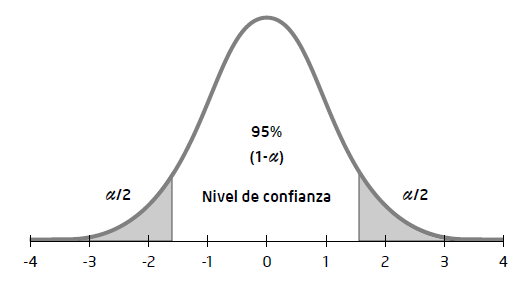


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import norm

**Ejercicio**\
Si los retornos de una determinada acción
se distribuyen normalmente (son N-iid). Se conoce la desviación estándar poblacional, la cual es igual a $\sigma=0.02$. Si se tiene una muestra aleatoria de 50 retornos del último año y se calcula la media muestral, que es igual a $\bar{x}=0.06$. Basandose en esta información, se quiere construir un intervalo de confianza del 95% para la media poblacional.

In [24]:
##definimos lo que sabemos
media_muestral=0.06
desv_est=0.03
n=50
raiz_n=50**0.5

Utilizaremos el pivoteo

Sabemos que el estimador de la media muestral se distribuye $\bar{x} \sim N(\mu,\frac{\sigma}{\sqrt{n}} )$

Si estandarizamos $Z=\frac{\bar{x}-\mu}{ \frac{\sigma}{\sqrt{n}} }$

por tanto:

$P(-Z_{\alpha/2} \leq Z \leq Z_{\alpha/2})= 0.95$

In [25]:
# los valores de z dado alfa
confianza = 0.95
alfa = 1 - confianza
z_izquierda = norm.ppf(alfa/2).round(2)
z_derecha = norm.ppf(1-alfa/2).round(2)
print('Los valores de Z a un nivel de confianza del 95%', (z_izquierda.round(2),z_derecha.round(2)))

Los valores de Z a un nivel de confianza del 95% (-1.96, 1.96)


 $P(-1.96\leq Z\leq 1.95)=0.95 $ \
 Pero sabemos que $Z=\frac{\bar{x}-\mu}{ \frac{\sigma}{\sqrt{n}} }$

por tanto \
$P(-1.96\leq \frac{\bar{x}-\mu}{ \sigma /\sqrt{n} } \leq 1.96)=0.95 $

Despejando para $\mu$



$P(-\bar{x}\;-1.96 \cdot{}\sigma /\sqrt{n}\;\leq -\mu \; \leq \;-\bar{x}\;+1.96 \cdot{}\sigma /\sqrt{n})=0.95 $

$P(\bar{x}-\;(1.96 \cdot{}\sigma /\sqrt{n})\;\leq \;\mu \; \leq\; \bar{x}\;+ (1.96 \cdot{}\sigma /\sqrt{n}))=0.95 $

In [26]:
limite_inferior = media_muestral + z_izquierda * (desv_est/raiz_n)
limite_superior = media_muestral + z_derecha * (desv_est/raiz_n)
print('El intervalo de confianza al 95% es', (limite_inferior.round(3), limite_superior.round(3)))

El intervalo de confianza al 95% es (0.052, 0.068)


## Prueba de Hipótesis

**Hipótesis nula ($H_0$)**: La hipótesis nula es la hipótesis que se desea testear (probar), es decir, es la hipótesis que será rechazada o no, de acuerdo a la evidencia proporcionada por los datos con los que se cuenta.

**Hipótesis alternativa ($H_a$)**: La hipótesis alternativa es la hipótesis que será contrastada con la hipótesis nula. Es decir, que si la hipótesis nula no es rechazada (es rechazada), implicará que la hipótesis alternativa será rechazada (no rechazada).

**Hipótesis mutuamente exclusivas**: Para que una prueba de hipótesis esté correctamente formulada, la hipótesis nula y la alternativa tienen que ser mutuamente exclusivas, es decir, que no pueden existir valores que sean consideradas por ambas hipótesis a la vez.

**Tipos de pruebas de hipótesis**

Pruebas no direccionales:\
$\begin{cases}{H_0:\mu=\mu_0}\\
H_a:\mu\neq\mu_0\end{cases}$

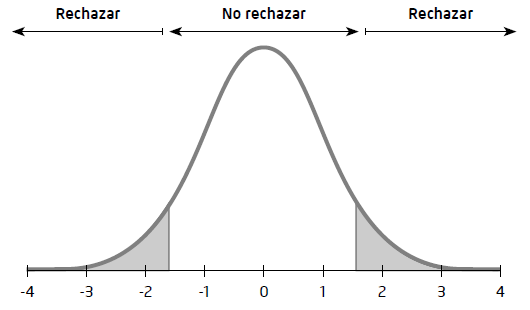

Pruebas direccionales:\
$\begin{cases}{H_0:\mu\geq\mu_0}\\
H_a:\mu<\mu_0\end{cases}$ o $\begin{cases}{H_0:\mu>\mu_0}\\
H_a:\mu\leq\mu_0\end{cases}$

O de lo contrario:\
$\begin{cases}{H_0:\mu\leq\mu_0}\\
H_a:\mu>\mu_0\end{cases}$ o $\begin{cases}{H_0:\mu<\mu_0}\\
H_a:\mu\geq\mu_0\end{cases}$


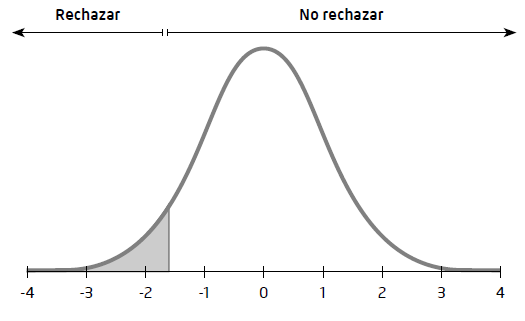

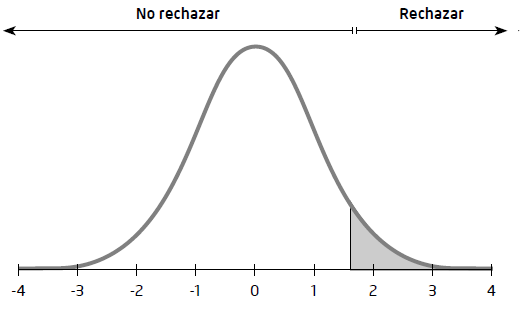

**Valor de probabilidad/p-valor/p-value**: muestra el nivel de significancia exacta que corresponde al estadístico calculado. Este valor está basado en la hipótesis nula y depende de la distribución que se esté utilizando para la realización de la prueba de la hipótesis. La regla general para decidir en base al p-valor es la siguiente: *Si el p-valor es menor que el nivel de significancia de la prueba ($α$), rechazar $H_0$, de manera contraria no rechazar la hipótesis nula*.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-llyw{background-color:#c0c0c0;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-llyw" rowspan="2">Decisión<br>Estadística</th>
    <th class="tg-llyw" colspan="2">Condición de la Hipótesis Nula</th>
  </tr>
  <tr>
    <th class="tg-llyw">Hipótesis Nula<br>verdadera</th>
    <th class="tg-llyw">Hipótesis Nula<br>Falsa</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">No Rechazar<br>Hipot Nula</td>
    <td class="tg-0pky">Decisión<br>Correcta</td>
    <td class="tg-0pky">Error Tipo II<br>&beta;</td>
  </tr>
  <tr>
    <td class="tg-0pky">Rechazar <br>Hipot Nula</td>
    <td class="tg-0pky">Error tipo I<br>&alpha;</td>
    <td class="tg-0pky">Decisión <br>Correcta</td>
  </tr>
</tbody>
</table>

**Error tipo I $(\alpha)$**: rechazar cuando algo es verdadero. Ejem cuando tu ex te decía la verdad y tu no le creías

**Error tipo II $(\beta)$**: aceptar como verdadero algo falso. Ejem cuando tu ex te mentía y tu le creías


**Ejercicio**\
Si los retornos de una determinada acción
se distribuyen normalmente (son N-iid). 
También, se supone que se conoce la desviación estándar poblacional, la cual es igual a $\sigma=0.02$. Si se tiene una muestra aleatoria de 50 retornos del último año y se calcula la media muestral, que es igual a $\bar{x}=0.06$. 

Se quiere realizar la siguiente prueba de hipótesis con un 95% de confianza:\
$\begin{cases}{H_0:\mu=0.061}\\
H_a:\mu\neq0.061\end{cases}$

Como es una prueba de dos colas, Primero vamos a encontrar los valores de Z, que si recuerda ya los habiamos encontrado

los valores de Z a un nivel de confianza del 95%  son (-1.96, 1.96)


ahora vamos a calcular el *z-test* o estadístico de prueba:\
$z-test=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}} $\
Sustituyendo\
$z-test=\frac{0.06-0.061}{0.02/\sqrt{50}} $

In [41]:
media_h0=0.061
z_test = (media_muestral - media_ho)/(desv_est/raiz_n)
print('El valor de z_test es', round(z_test,2))

El valor de z_test es -0.24


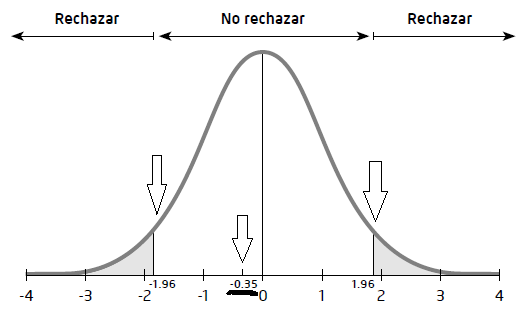

In [43]:
print(F'Con un 95% de confianza no podemos rechazar H0.\nEs decir {media_h0} es un valor posible del parámetro o media poblacional.')

Con un 95% de confianza no podemos rechazar H0.
Es decir 0.061 es un valor posible del parámetro o media poblacional.


Vamos a calcular el **p-value** que corresponde al nivel de significancia exacta del estadístico calculado. Cómo es una prueba de dos colas, se necesita saber $P(Z>0.35)$ y $P(Z<-0.35)$ 

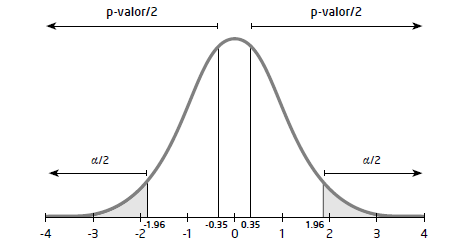

In [33]:
prob_ztest=norm.cdf(z_test).round(2)

p_value = 2 * prob_ztest

Regla de decisión: si el **p-valor**$ < \alpha $ entonces rechazar $H_0$.

In [44]:
if p_value < 0.05:
    
    print(f'Con un p-value = {p_value}\nSe rechaza hipótesis nula.')

else:
    
    print(f'Con un p-value = {p_value}\nNO se rechaza hipótesis nula.')


Con un p-value = 0.82
NO se rechaza hipótesis nula.


Recuerde que el P-value corresponde el nivel de significancia exacta ($ \alpha$), recuerde que el $\alpha$ es el error tipo I, es decir, la probabilidad de rechazar algo cierto. Tenemos una probabilidad de 72% de rechazar algo cierto; es una probabilidad muy alta de rechazar algo verdadero, por lógica no deberiamos rechazar la hipótesis nula.      

## VaR Valor en Riesgo (Value at Risk)